In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
df=pd.read_csv('Full_Data_Nubi_Drive_NEW.csv')

In [19]:
psy=pd.read_csv('Psychometric_Data.csv')

In [20]:
psy=pd.get_dummies(psy, columns=['Gender'])

In [21]:
station=df[df['Trip'].isnull()]
station2 = station[station['BPM'].notna()]
df_12=station2[station2['P_ID']=='P12']
df_13=station2[station2['P_ID']=='P13']
df_15=station2[station2['P_ID']=='P15']
df_17=station2[station2['P_ID']=='P17']
df_18=station2[station2['P_ID']=='P18']
df_19=station2[station2['P_ID']=='P19']
df_20=station2[station2['P_ID']=='P20']
df_22=station2[station2['P_ID']=='P22']
df_23=station2[station2['P_ID']=='P23']
df_24=station2[station2['P_ID']=='P24']
df_27=station2[station2['P_ID']=='P27']

arr=[df_12,df_13,df_15,df_17,df_18,df_19,df_20,df_22,df_23,df_24,df_27]
new_arr=[]

for elem in arr:
    avg=elem['BPM'].mean()
    new_arr.append(avg)
new_df=pd.DataFrame()
new_df['P_ID']=['P12','P13','P15','P17','P18','P19','P20','P22','P23','P24','P27']
new_df['Averages']=new_arr

In [22]:
df_2=df.drop(['Time', 'latitudes', 'longitudes', 'Time_Second'], axis=1)
corr_matrix=df_2.corr().abs()
half_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
dropped_columns = [column for column in half_matrix.columns if any(half_matrix[column] > 0.8)]
df_2.drop(dropped_columns, axis=1, inplace=True)

/var/folders/41/rlmz0mh15dx9_qw9xxbv4mq00000gn/T/ipykernel_4997/1899529646.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  half_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [23]:
df_12=df_2[df_2['P_ID']=='P12']
df_13=df_2[df_2['P_ID']=='P13']
df_15=df_2[df_2['P_ID']=='P15']
df_17=df_2[df_2['P_ID']=='P17']
df_18=df_2[df_2['P_ID']=='P18']
df_19=df_2[df_2['P_ID']=='P19']
df_20=df_2[df_2['P_ID']=='P20']
df_22=df_2[df_2['P_ID']=='P22']
df_23=df_2[df_2['P_ID']=='P23']
df_24=df_2[df_2['P_ID']=='P24']
df_27=df_2[df_2['P_ID']=='P27']

arr=[df_12,df_13,df_15,df_17,df_18,df_19,df_20,df_22,df_23,df_24,df_27]
counter=0
for elem in arr:
    elem['BPM']=elem['BPM']-new_arr[counter]
    counter+=1
    
df_new=pd.concat([df_12, df_13, df_15, df_17, df_18, df_19, df_20, df_22, df_23, df_24, df_27])

# df_2=df_new.drop('P_ID', axis=1)
df_2=df_new

/var/folders/41/rlmz0mh15dx9_qw9xxbv4mq00000gn/T/ipykernel_4997/471915236.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elem['BPM']=elem['BPM']-new_arr[counter]


In [24]:
df_2=pd.get_dummies(df_2, columns=['Trip','Day','Src_Weather_Info','Des_Weather_Info'])

In [25]:
df_2=pd.merge(df_2, psy, on='P_ID')

In [26]:
df_2.drop('P_ID', axis=1, inplace=True)

In [27]:
df_2=df_2.dropna(axis=0)

In [28]:
df_2

,Speed_MPH,ATP,BP_Hg,BPM,JF,FF,Src_Temperature,Src_Pressure,Src_WindSpeed,Trip_Trip1,...,Des_Weather_Info_Thunderstorm,Age,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Gender_Female,Gender_Male
8906,20.500000,16.900000,28.9,-6.080198,1.70738,24.79,84.04,1014.0,10.36,1,...,0,27,45,8,9,9,8,6,1,0
8911,9.500000,20.000000,28.9,-3.080198,1.43925,25.85,84.04,1014.0,10.36,1,...,0,27,45,8,9,9,8,6,1,0
8912,22.000000,16.600000,28.9,-6.080198,1.70738,24.79,84.04,1014.0,10.36,1,...,0,27,45,8,9,9,8,6,1,0
8920,0.333333,16.900000,28.9,2.919802,2.42528,28.40,84.04,1014.0,10.36,1,...,0,27,45,8,9,9,8,6,1,0
8933,3.333333,17.300000,28.9,5.919802,2.42528,28.40,84.04,1014.0,10.36,1,...,0,27,45,8,9,9,8,6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2064695,15.333333,16.866667,29.5,-7.230071,0.00000,45.61,93.45,1017.0,10.36,0,...,0,27,32,9,7,9,4,7,0,1
2064700,20.000000,11.000000,29.5,-5.230071,0.00000,45.61,93.45,1017.0,10.36,0,...,0,27,32,9,7,9,4,7,0,1
2064704,15.000000,10.350000,29.5,-8.230071,0.00000,45.61,93.45,1017.0,10.36,0,...,0,27,32,9,7,9,4,7,0,1
2064710,4.500000,14.050000,29.5,-3.230071,0.00000,45.61,93.45,1017.0,10.36,0,...,0,27,32,9,7,9,4,7,0,1


In [36]:
from scipy.stats import pearsonr
import pandas as pd

def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

In [39]:
df_2.drop(['Trip_Trip8', 'Trip_Trip9'], axis=1, inplace=True)

In [40]:
calculate_pvalues(df_2)

,Speed_MPH,ATP,BP_Hg,BPM,JF,FF,Src_Temperature,Src_Pressure,Src_WindSpeed,Trip_Trip1,...,Des_Weather_Info_Thunderstorm,Age,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Gender_Female,Gender_Male
Speed_MPH,0.0,0.0,0.143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.8381,0.0,0.0,0.0,0.0
ATP,0.0,0.0,0.0823,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.2832,0.0,0.0,0.0,0.0,0.0,0.4219,0.4219
BP_Hg,0.143,0.0823,0.0,0.0035,0.1587,0.583,0.0,0.0,0.0,0.0,...,0.0002,0.0,0.0,0.0,0.0747,0.0,0.0,0.0,0.0,0.0
BPM,0.0,0.0,0.0035,0.0,0.0,0.0,0.0,0.7417,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
JF,0.0,0.0,0.1587,0.0,0.0,0.0,0.918,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0102,0.0,0.0,0.0,0.0
FF,0.0,0.0,0.583,0.0,0.0,0.0,0.0,0.0,0.1014,0.0,...,0.0104,0.0,0.0,0.0,0.0,0.0773,0.0,0.0,0.0,0.0
Src_Temperature,0.0,0.0,0.0,0.0,0.918,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Src_Pressure,0.0,0.0,0.0,0.7417,0.0,0.0,0.0,0.0,0.0,0.3898,...,0.0,0.0,0.0,0.0,0.0,0.1829,0.0,0.0,0.0,0.0
Src_WindSpeed,0.0,0.0,0.0,0.0,0.0,0.1014,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.4551,0.4872,0.0,0.0,0.0002,0.0452,0.0452
Trip_Trip1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3898,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


TypeError: Image data of dtype object cannot be converted to float

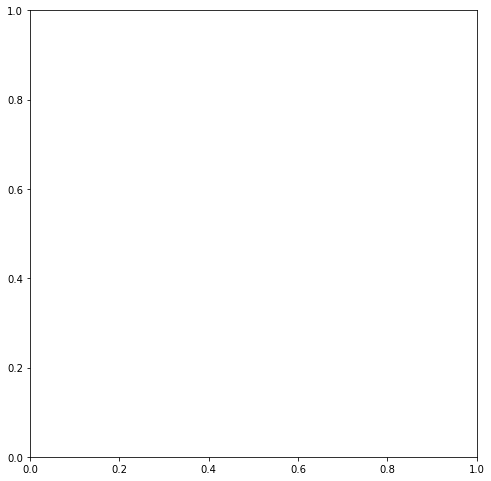

In [41]:
f = plt.figure(figsize=(8,8))
plt.matshow(calculate_pvalues(df_2), fignum=f.number)
plt.xticks(range(df_2.select_dtypes(['number']).shape[1]), df_2.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(df_2.select_dtypes(['number']).shape[1]), df_2.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [29]:
df_corr=df_2.corr()

In [30]:
df_corr

,Speed_MPH,ATP,BP_Hg,BPM,JF,FF,Src_Temperature,Src_Pressure,Src_WindSpeed,Trip_Trip1,...,Des_Weather_Info_Thunderstorm,Age,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Gender_Female,Gender_Male
Speed_MPH,1.000000,0.455875,-0.007375,-0.127193,-0.325776,0.475645,0.029254,0.069529,0.063553,0.046020,...,-0.029283,-0.190750,-0.045146,-0.137525,-0.379954,0.001029,-0.200739,0.385005,-0.233686,0.233686
ATP,0.455875,1.000000,0.008749,-0.075482,-0.129812,0.257309,0.051156,-0.059612,0.064569,0.060693,...,-0.069026,-0.097433,-0.005403,-0.057370,-0.204628,-0.147282,-0.055871,0.288111,-0.004044,0.004044
BP_Hg,-0.007375,0.008749,1.000000,0.014715,0.007097,0.002764,-0.095377,0.091783,-0.081487,0.043388,...,0.018522,0.110972,-0.051133,-0.079266,-0.008974,-0.078961,-0.029454,0.039004,0.059230,-0.059230
BPM,-0.127193,-0.075482,0.014715,1.000000,-0.025382,-0.031539,0.059256,0.001659,0.219141,-0.142873,...,-0.034769,0.141197,-0.081798,0.179881,0.157425,-0.061817,0.168133,-0.175345,0.049254,-0.049254
JF,-0.325776,-0.129812,0.007097,-0.025382,1.000000,-0.345246,0.000518,-0.022833,-0.108328,-0.031408,...,0.144803,0.071983,0.090349,0.086777,0.219999,-0.012939,0.120281,-0.226370,0.205145,-0.205145
FF,0.475645,0.257309,0.002764,-0.031539,-0.345246,1.000000,-0.056980,0.074969,0.008249,0.030994,...,-0.012895,-0.139971,0.092246,-0.144269,-0.237764,-0.008896,-0.141293,0.225100,-0.080771,0.080771
Src_Temperature,0.029254,0.051156,-0.095377,0.059256,0.000518,-0.056980,1.000000,-0.134546,0.182922,-0.469380,...,0.041016,-0.022736,-0.097516,0.021235,-0.052137,-0.021268,0.031366,0.061740,-0.085630,0.085630
Src_Pressure,0.069529,-0.059612,0.091783,0.001659,-0.022833,0.074969,-0.134546,1.000000,-0.325112,0.004330,...,0.110724,0.293011,-0.438642,0.104719,-0.121205,-0.006707,-0.386477,0.255220,-0.315292,0.315292
Src_WindSpeed,0.063553,0.064569,-0.081487,0.219141,-0.108328,0.008249,0.182922,-0.325112,1.000000,-0.120641,...,0.061484,-0.219153,0.152614,-0.003761,-0.003499,0.187663,0.195306,0.018659,0.010084,-0.010084
Trip_Trip1,0.046020,0.060693,0.043388,-0.142873,-0.031408,0.030994,-0.469380,0.004330,-0.120641,1.000000,...,0.099582,0.022239,-0.152271,0.029426,-0.111350,-0.045438,-0.138361,0.190200,-0.118844,0.118844


In [31]:
df_final_corr=df_corr['BPM']

In [32]:
df_final_corr.sort_values(ascending=False)

BPM                              1.000000
Day_Day2                         0.222239
Src_WindSpeed                    0.219141
Trip_Trip4                       0.182018
Extraversion                     0.179881
Neuroticism                      0.168133
Agreeableness                    0.157425
Age                              0.141197
Des_Weather_Info_Clouds          0.117234
Trip_Trip7                       0.066516
Trip_Trip6                       0.064731
Trip_Trip5                       0.063863
Src_Temperature                  0.059256
Day_Day3                         0.052335
Day_Day4                         0.051646
Gender_Female                    0.049254
Day_Day1                         0.027690
Src_Weather_Info_Clouds          0.023137
BP_Hg                            0.014715
Trip_Trip3                       0.012328
Src_Pressure                     0.001659
Src_Weather_Info_Clear           0.000754
Trip_Trip2                      -0.021166
Src_Weather_Info_Drizzle        -0

In [30]:
df_2=df_2.drop(['Trip_Trip8', 'Trip_Trip9'], axis=1)

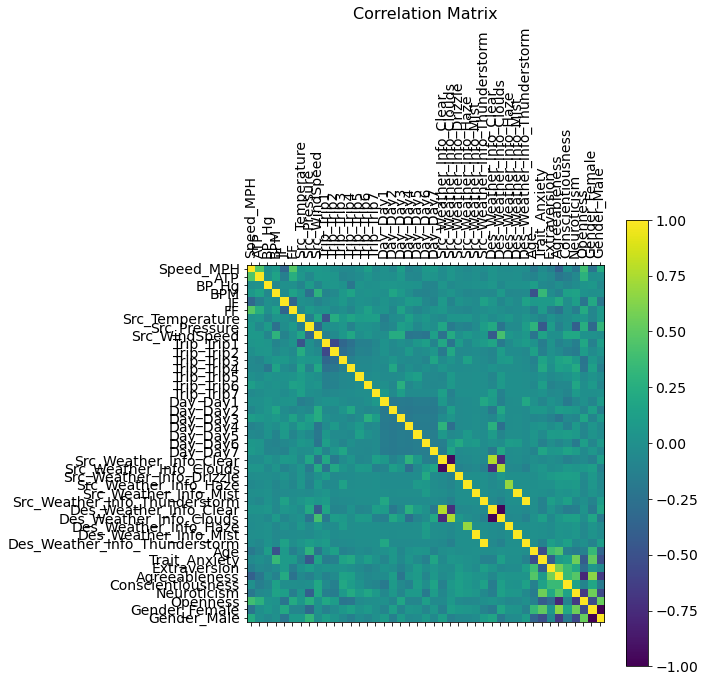

In [31]:
f = plt.figure(figsize=(8,8))
plt.matshow(df_2.corr(), fignum=f.number)
plt.xticks(range(df_2.select_dtypes(['number']).shape[1]), df_2.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(df_2.select_dtypes(['number']).shape[1]), df_2.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [24]:
df_2

,Speed_MPH,ATP,BP_Hg,BPM,JF,FF,Src_Temperature,Src_Pressure,Src_WindSpeed,Trip_Trip1,...,Src_Weather_Info_Clouds,Src_Weather_Info_Drizzle,Src_Weather_Info_Haze,Src_Weather_Info_Mist,Src_Weather_Info_Thunderstorm,Des_Weather_Info_Clear,Des_Weather_Info_Clouds,Des_Weather_Info_Haze,Des_Weather_Info_Mist,Des_Weather_Info_Thunderstorm
8906,20.500000,16.900000,28.9,-5.646517,1.70738,24.79,84.04,1014.0,10.36,1,...,1,0,0,0,0,0,1,0,0,0
8911,9.500000,20.000000,28.9,-2.646517,1.43925,25.85,84.04,1014.0,10.36,1,...,1,0,0,0,0,0,1,0,0,0
8912,22.000000,16.600000,28.9,-5.646517,1.70738,24.79,84.04,1014.0,10.36,1,...,1,0,0,0,0,0,1,0,0,0
8920,0.333333,16.900000,28.9,3.353483,2.42528,28.40,84.04,1014.0,10.36,1,...,1,0,0,0,0,0,1,0,0,0
8933,3.333333,17.300000,28.9,6.353483,2.42528,28.40,84.04,1014.0,10.36,1,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2064695,15.333333,16.866667,29.5,-7.068226,0.00000,45.61,93.45,1017.0,10.36,0,...,1,0,0,0,0,0,1,0,0,0
2064700,20.000000,11.000000,29.5,-5.068226,0.00000,45.61,93.45,1017.0,10.36,0,...,1,0,0,0,0,0,1,0,0,0
2064704,15.000000,10.350000,29.5,-8.068226,0.00000,45.61,93.45,1017.0,10.36,0,...,1,0,0,0,0,0,1,0,0,0
2064710,4.500000,14.050000,29.5,-3.068226,0.00000,45.61,93.45,1017.0,10.36,0,...,1,0,0,0,0,0,1,0,0,0
